# Final Project 
## Done By
### Venkata Sai Vardhan Bora,
### Andria Grace,
### Priyadarshini Munigala

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# To Specify the file path which is stored in my computer
file_path = '/Users/venkatasaivardhanbora/Desktop/inpatientCharges.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# For Displaying the first 10 elements of the DataFrame
df.head(10)

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
5  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10023   
6  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10029   
7  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10033   
8  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10039   
9  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10040   

                         Provider Name     Provider Street Address  \
0     SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2       ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3                    ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE   
4        SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH   
5         BAPTIST MEDICAL CENTER SOUTH   2105 EAST SOUTH BOULEVARD   
6  EAST ALABAMA MEDICAL CENTER AND SNF      2000 PEPPERELL PARKWAY   
7       UNIVERSITY OF ALABAMA HOSPITAL       619 SOUTH 19TH STREET   
8                  HUNTSVILLE HOSPITAL               101 SIVLEY RD   
9      GADSDEN REGIONAL MEDICAL CENTER        1007 GOODYEAR AVENUE   

  Provider City Provider State  Provider Zip Code  \
0        DOTHAN             AL              36301   
1          BOAZ             AL              35957   
2      FLORENCE             AL              35631   
3    BIRMINGHAM             AL              35235   
4     ALABASTER             AL              35007   
5    MONTGOMERY             AL              36116   
6       OPELIKA             AL              36801   
7    BIRMINGHAM             AL              35233   
8    HUNTSVILLE             AL              35801   
9       GADSDEN             AL              35903   

  Hospital Referral Region Description   Total Discharges   \
0                          AL - Dothan                  91   
1                      AL - Birmingham                  14   
2                      AL - Birmingham                  24   
3                      AL - Birmingham                  25   
4                      AL - Birmingham                  18   
5                      AL - Montgomery                  67   
6                      AL - Birmingham                  51   
7                      AL - Birmingham                  32   
8                      AL - Huntsville                 135   
9                      AL - Birmingham                  34   

   Average Covered Charges   Average Total Payments  Average Medicare Payments  
0                 $32963.07                 $5777.24                  $4763.73  
1                 $15131.85                 $5787.57                  $4976.71  
2                 $37560.37                 $5434.95                  $4453.79  
3                 $13998.28                 $5417.56                  $4129.16  
4                 $31633.27                 $5658.33                  $4851.44  
5                 $16920.79                 $6653.80                  $5374.14  
6                 $11977.13                 $5834.74                  $4761.41  
7                 $35841.09                 $8031.12                  $5858.50  
8                 $28523.39                 $6113.38                  $5228.40  
9                 $75233.38                 $5541.05                  $4386.94

# Checking Data Quality:
## Searching for null values, Dublicated values

In [3]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print("Missing Values:\n", pd.DataFrame({'Missing': missing_values, 'Percentage': percentage_missing}))

Missing Values:
                                       Missing  Percentage
DRG Definition                              0         0.0
Provider Id                                 0         0.0
Provider Name                               0         0.0
Provider Street Address                     0         0.0
Provider City                               0         0.0
Provider State                              0         0.0
Provider Zip Code                           0         0.0
Hospital Referral Region Description        0         0.0
 Total Discharges                           0         0.0
 Average Covered Charges                    0         0.0
 Average Total Payments                     0         0.0
Average Medicare Payments                   0         0.0


In [4]:
duplicates = df.duplicated()
print("Duplicate Rows:\n", df[duplicates])

Duplicate Rows:
 Empty DataFrame
Columns: [DRG Definition, Provider Id, Provider Name, Provider Street Address, Provider City, Provider State, Provider Zip Code, Hospital Referral Region Description,  Total Discharges ,  Average Covered Charges ,  Average Total Payments , Average Medicare Payments]
Index: []


### So there are no missing values and Dublcated 

### We can Proceed with the next step 

In [5]:
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object


### we need to change the coloumns Average Covered Charges, Average Total Payments, Average Medicare Payments into Numeric datatype(Convert columns with '$' to numeric)

In [6]:
#Creating new data Frame(tf) for computing purpose so that it doesnt change the orginal style
tf=df
# Convert columns with '$' to numeric
tf[' Average Total Payments '] = tf[' Average Total Payments '].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
tf[' Average Covered Charges '] = tf[' Average Covered Charges '].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
tf['Average Medicare Payments'] = tf['Average Medicare Payments'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
tf.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

    Total Discharges    Average Covered Charges    Average Total Payments   \
0                  91                   32963.07                   5777.24   
1                  14                   15131.85                   5787.57   
2                  24                   37560.37                   5434.95   
3                  25                   13998.28                   5417.56   
4                  18                   31633.27                   5658.33   

   Average Medicare Payments  
0                    4763.73  
1                    4976.71  
2                    4453.79  
3                    4129.16  
4                    4851.44

### Check for Outlier in Data coloumns of Total Discharges,Average Covered Charges,Average Total Payments	and Average Medicare Payments

In [7]:
# Calculate Z-scores
z_score_Total_Discharges = stats.zscore(tf[' Total Discharges '])
z_score_Average_Covered_Charges = stats.zscore(tf[' Average Covered Charges '])
z_score_Average_Total_Payments = stats.zscore(tf[' Average Total Payments '])
z_score_Average_Medicare_Payments = stats.zscore(tf['Average Medicare Payments'])

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliersTotal_Discharges = tf[' Total Discharges '][abs(z_score_Total_Discharges) > threshold]
outliersAverage_Covered_Charges = tf[' Average Covered Charges '][abs(z_score_Average_Covered_Charges) > threshold]
outliersAverage_Total_Payments = tf[' Average Total Payments '][abs(z_score_Average_Total_Payments) > threshold]
outliers_Average_Medicare_Payments = tf['Average Medicare Payments'][abs(z_score_Average_Medicare_Payments) > threshold]


# Print the outliers
print("Outliers in Total_Discharges:", outliersTotal_Discharges)
print("Outliers Average_Covered_Charges:", outliersAverage_Covered_Charges)
print("Outliers Average_Total_Payments:", outliersAverage_Total_Payments)
print("Outliers Average_Medicare_Payments:", outliers_Average_Medicare_Payments)

Outliers in Total_Discharges: 1251      224
3687      230
3707      206
3849      205
4338      285
         ... 
158748    296
158763    262
158851    431
158916    199
161557    244
Name:  Total Discharges , Length: 2790, dtype: int64
Outliers Average_Covered_Charges: 123       146892.00
1191      148128.43
2397      149950.26
2405      161240.45
2414      148617.27
            ...    
159132    148675.76
159144    236455.90
159148    144038.08
159150    187714.95
159721    151508.42
Name:  Average Covered Charges , Length: 3139, dtype: float64
Outliers Average_Total_Payments: 2428      35275.57
2461      33918.23
2800      38370.00
2992      50882.40
3354      33598.31
            ...   
152583    39366.23
152625    35090.66
153397    44003.90
153985    33054.84
159452    33251.14
Name:  Average Total Payments , Length: 4152, dtype: float64
Outliers Average_Medicare_Payments: 2428      34455.00
2461      33054.88
2992      48632.28
3354      32734.92
15106     32841.77
            .

### Change the outliers in Winsorizing technique where extreme values (outliers) are replaced with values closer to the mean or median of the dataset

In [8]:
# Create new columns to store non-outlier values
tf['Total Discharges No Outliers'] = np.where(abs(z_score_Total_Discharges) <= threshold, tf[' Total Discharges '], np.nan)
tf['Average Covered Charges No Outliers'] = np.where(abs(z_score_Average_Covered_Charges) <= threshold, tf[' Average Covered Charges '], np.nan)
tf['Average Total Payments No Outliers'] = np.where(abs(z_score_Average_Total_Payments) <= threshold, tf[' Average Total Payments '], np.nan)
tf['Average Medicare Payments No Outliers'] = np.where(abs(z_score_Average_Medicare_Payments) <= threshold, tf['Average Medicare Payments'], np.nan)

### Check for outliners once again

In [9]:
# Calculate Z-scores
z_score_Total_Discharges = stats.zscore(tf['Total Discharges No Outliers'])
z_score_Average_Covered_Charges = stats.zscore(tf['Average Covered Charges No Outliers'])
z_score_Average_Total_Payments = stats.zscore(tf['Average Total Payments No Outliers'])
z_score_Average_Medicare_Payments = stats.zscore(tf['Average Medicare Payments No Outliers'])

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliersTotal_Discharges = tf['Total Discharges No Outliers'][abs(z_score_Total_Discharges) > threshold]
outliersAverage_Covered_Charges = tf['Average Covered Charges No Outliers'][abs(z_score_Average_Covered_Charges) > threshold]
outliersAverage_Total_Payments = tf['Average Total Payments No Outliers'][abs(z_score_Average_Total_Payments) > threshold]
outliers_Average_Medicare_Payments = tf['Average Medicare Payments No Outliers'][abs(z_score_Average_Medicare_Payments) > threshold]


# Print the outliers
print("Outliers in Total Discharges No Outliers:", outliersTotal_Discharges)
print("Outliers in Average Covered Charges No Outliers:", outliersAverage_Covered_Charges)
print("Outliers in Average Total Payments No Outliers", outliersAverage_Total_Payments)
print("Outliers in Average Medicare Payments No Outliers", outliers_Average_Medicare_Payments)

Outliers in Total Discharges No Outliers: Series([], Name: Total Discharges No Outliers, dtype: float64)
Outliers in Average Covered Charges No Outliers: Series([], Name: Average Covered Charges No Outliers, dtype: float64)
Outliers in Average Total Payments No Outliers Series([], Name: Average Total Payments No Outliers, dtype: float64)
Outliers in Average Medicare Payments No Outliers Series([], Name: Average Medicare Payments No Outliers, dtype: float64)


In [10]:
df.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

    Total Discharges    Average Covered Charges    Average Total Payments   \
0                  91                   32963.07                   5777.24   
1                  14                   15131.85                   5787.57   
2                  24                   37560.37                   5434.95   
3                  25                   13998.28                   5417.56   
4                  18                   31633.27                   5658.33   

   Average Medicare Payments  Total Discharges No Outliers  \
0                    4763.73                          91.0   
1                    4976.71                          14.0   
2                    4453.79                          24.0   
3                    4129.16                          25.0   
4                    4851.44                          18.0   

   Average Covered Charges No Outliers  Average Total Payments No Outliers  \
0                             32963.07                             5777.24   
1                             15131.85                             5787.57   
2                             37560.37                             5434.95   
3                             13998.28                             5417.56   
4                             31633.27                             5658.33   

   Average Medicare Payments No Outliers  
0                                4763.73  
1                                4976.71  
2                                4453.79  
3                                4129.16  
4                                4851.44

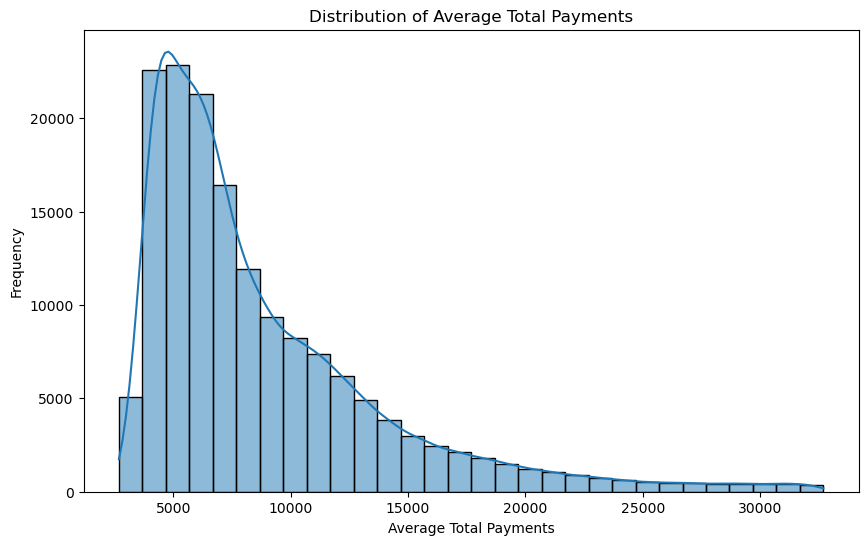

In [11]:
# Distribution of single variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Total Payments No Outliers'], bins=30, kde=True)
plt.title('Distribution of Average Total Payments')
plt.xlabel('Average Total Payments')
plt.ylabel('Frequency')
plt.show()


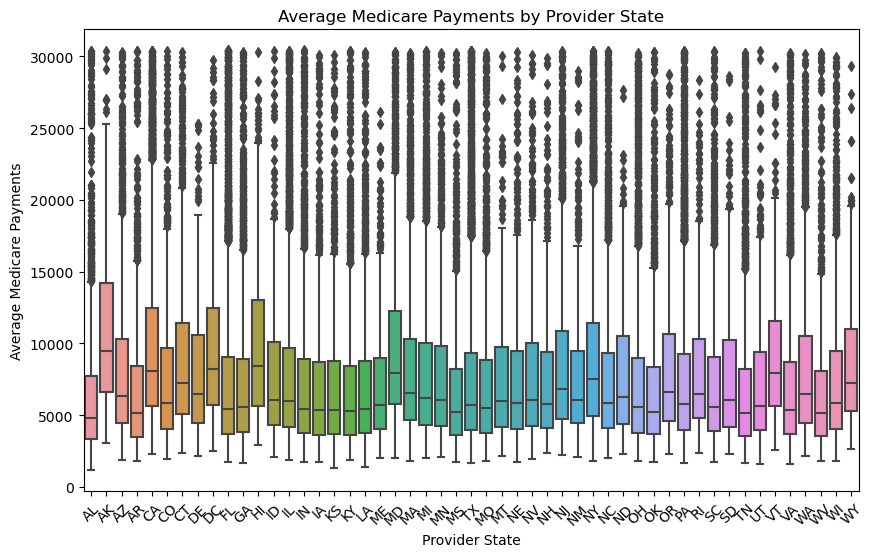

In [12]:
# Distribution of one variable by another categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provider State', y='Average Medicare Payments No Outliers', data=df)
plt.title('Average Medicare Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Medicare Payments')
plt.xticks(rotation=45)
plt.show()

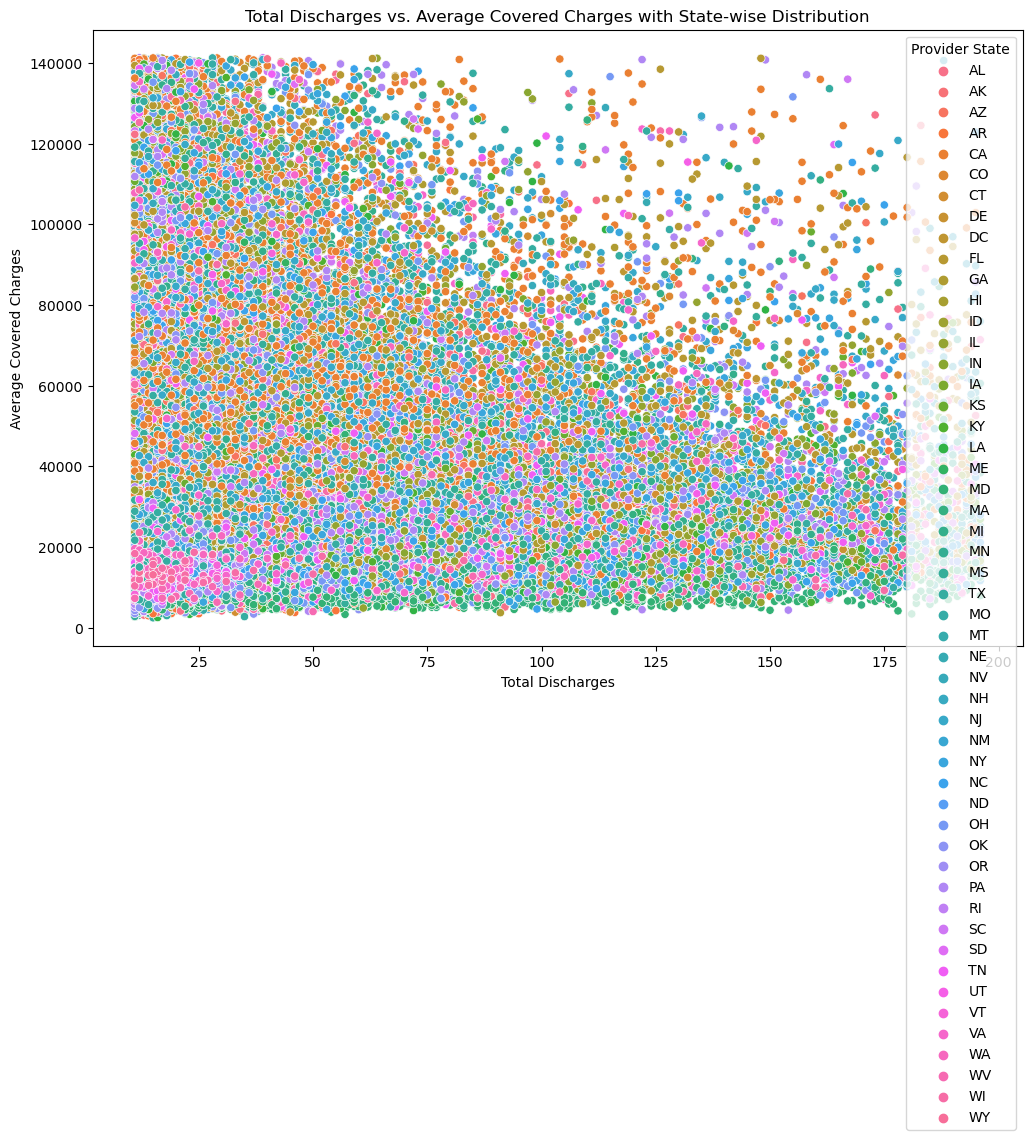

In [13]:
# Interactions of two or three variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Discharges No Outliers', y='Average Covered Charges No Outliers', hue='Provider State', data=df)
plt.title('Total Discharges vs. Average Covered Charges with State-wise Distribution')
plt.xlabel('Total Discharges')
plt.ylabel('Average Covered Charges')
plt.legend(title='Provider State')
plt.show()

### 1.Medicare Payments Ratio: Unusual ratios may indicate fraudulent billing practices, as fraudsters might manipulate Medicare-related transactions.

In [14]:
df['Medicare_Payments_Ratio'] = df['Average Medicare Payments No Outliers'] / df['Average Total Payments No Outliers']

### 2.Total Payments per Discharge: Unusual values may highlight anomalies in billing for services per discharge.

In [15]:
df['Total_Payments_Per_Discharge'] = df['Average Total Payments No Outliers'] / df['Total Discharges No Outliers']

### 3.Charge to Payment Ratio: Large discrepancies might indicate overcharging or underreporting, potentially flagging fraudulent behavior.

In [16]:
df['Charge_Per_Payment'] = df['Average Covered Charges No Outliers'] / df['Average Total Payments No Outliers']

### 4.Medicare Payments to Charges Ratio: A significant difference may suggest irregularities in the relationship between charges and Medicare payments.

In [17]:
df['Medicare_Payments_to_Charges'] = df['Average Medicare Payments No Outliers'] / df['Average Covered Charges No Outliers']


### 5.Average Covered Charges per State: Deviations from the state mean can highlight abnormal charging practices within specific regions.

In [18]:
df['Avg_Covered_Charges_by_State'] = df.groupby('Provider State')['Average Covered Charges No Outliers'].transform('mean')

### 6.Deviation from State Average Covered Charges: Identifies providers deviating significantly from the average charges in their respective states.

In [19]:
df['Deviation_from_State_Avg'] = df['Average Covered Charges No Outliers'] - df['Avg_Covered_Charges_by_State']

### 7. Discharge Percentage in Hospital Referral Region: Highlights providers with unusually high or low discharge percentages in a given region.

In [20]:
df['Discharge_Pct_in_HRR'] = df['Total Discharges No Outliers'] / df.groupby('Hospital Referral Region Description')['Total Discharges No Outliers'].transform('sum')


### 8.Average Medicare Payments by Provider: Identifies providers with consistent Medicare payment patterns, aiding in spotting anomalies.

In [21]:
df['Avg_Medicare_Payments_by_Provider'] = df.groupby('Provider Id')['Average Medicare Payments No Outliers'].transform('mean')


### Difference from Avg Medicare Payments by Provider: Highlights providers with unusual deviations in Medicare payments.

In [22]:
df['Diff_from_Avg_Medicare_Payments'] = df['Average Medicare Payments No Outliers'] - df['Avg_Medicare_Payments_by_Provider']


### 10.Average Total Payments by DRG Definition: Detects patterns in payment behavior specific to certain DRG categories. 

In [23]:
df['Avg_Total_Payments_by_DRG'] = df.groupby('DRG Definition')['Average Total Payments No Outliers'].transform('mean')


### 11.Difference from Avg Total Payments by DRG: Flags unusual billing practices within specific DRG groups.

In [24]:
df['Diff_from_Avg_Total_Payments_by_DRG'] = df['Average Total Payments No Outliers'] - df['Avg_Total_Payments_by_DRG']


### 12.Discharge Percentage by Provider: Highlights providers with atypical discharge percentages compared to their peers.

In [25]:
df['Discharge_Pct_by_Provider'] = df['Total Discharges No Outliers'] / df.groupby('Provider Id')['Total Discharges No Outliers'].transform('sum')


### 13.Variation from Provider Discharge Percentage: Identifies providers with significant deviations in discharge percentages.

In [26]:
df['Variation_from_Provider_Discharge_Pct'] = df['Total Discharges No Outliers'] - df['Discharge_Pct_by_Provider']


### 14. Average Total Payments by Hospital Referral Region: Reveals payment patterns specific to geographical regions.

In [27]:
df['Avg_Total_Payments_by_HRR'] = df.groupby('Hospital Referral Region Description')['Average Total Payments No Outliers'].transform('mean')


### 15.Deviation from HRR Avg Total Payments: Flags providers with abnormal payment patterns compared to the average in their region.

In [28]:
df['Deviation_from_HRR_Avg_Total_Payments'] = df['Average Total Payments No Outliers'] - df['Avg_Total_Payments_by_HRR']


### 16.Charges to Discharges Ratio: Identifies providers with unusual charging practices relative to the number of discharges.

In [29]:
df['Charges_to_Discharges_Ratio'] = df['Average Covered Charges No Outliers'] / df['Total Discharges No Outliers']


### 17.Difference from State Avg Medicare Payments: Highlights providers with abnormal Medicare payment patterns compared to the average in their state.

In [30]:
df['Diff_from_State_Avg_Medicare_Payments'] = df['Average Medicare Payments No Outliers'] - df.groupby('Provider State')['Average Medicare Payments No Outliers'].transform('mean')


### 18.High-Cost Discharges Indicator: Flags instances of exceptionally high-cost discharges.

In [31]:
df['High_Cost_Discharges'] = (df['Average Covered Charges No Outliers'] > df['Average Covered Charges No Outliers'].quantile(0.75)).astype(int)

### 19.Average Total Payments per DRG Definition: Detects patterns in payment behavior specific to certain DRG categories.

In [32]:
df['Avg_Total_Payments_per_DRG'] = df.groupby('DRG Definition')['Average Total Payments No Outliers'].transform('mean')

### 20.Difference from Overall Avg Total Payments: Flags providers with unusual billing practices compared to the overall average.

In [33]:
df['Diff_from_Overall_Avg_Total_Payments'] = df['Average Total Payments No Outliers'] - df['Average Total Payments No Outliers'].mean()

In [34]:
df.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

    Total Discharges    Average Covered Charges   ...  \
0                  91                   32963.07  ...   
1                  14                   15131.85  ...   
2                  24                   37560.37  ...   
3                  25                   13998.28  ...   
4                  18                   31633.27  ...   

   Diff_from_Avg_Total_Payments_by_DRG  Discharge_Pct_by_Provider  \
0                         -1183.294004                   0.019549   
1                         -1172.964004                   0.009866   
2                         -1525.584004                   0.006504   
3                         -1542.974004                   0.009297   
4                         -1302.204004                   0.007146   

   Variation_from_Provider_Discharge_Pct  Avg_Total_Payments_by_HRR  \
0                              90.980451                6961.640796   
1                              13.990134                7398.749452   
2                              23.993496                7398.749452   
3                              24.990703                7398.749452   
4                              17.992854                7398.749452   

   Deviation_from_HRR_Avg_Total_Payments  Charges_to_Discharges_Ratio  \
0                           -1184.400796                   362.231538   
1                           -1611.179452                  1080.846429   
2                           -1963.799452                  1565.015417   
3                           -1981.189452                   559.931200   
4                           -1740.419452                  1757.403889   

   Diff_from_State_Avg_Medicare_Payments  High_Cost_Discharges  \
0                           -1396.227682                     0   
1                           -1183.247682                     0   
2                           -1706.167682                     0   
3                           -2030.797682                     0   
4                           -1308.517682                     0   

   Avg_Total_Payments_per_DRG  Diff_from_Overall_Avg_Total_Payments  
0                 6960.534004                          -3058.472384  
1                 6960.534004                          -3048.142384  
2                 6960.534004                          -3400.762384  
3                 6960.534004                          -3418.152384  
4                 6960.534004                          -3177.382384  

[5 rows x 36 columns]

# PCA (Principal Component Analysis):
### PCA is a technique that simplifies complex data by highlighting its essential features. It achieves this by pinpointing the directions in which the data varies the most, providing a concise representation in a lower-dimensional form. This enables effective visualization and analysis of intricate datasets.

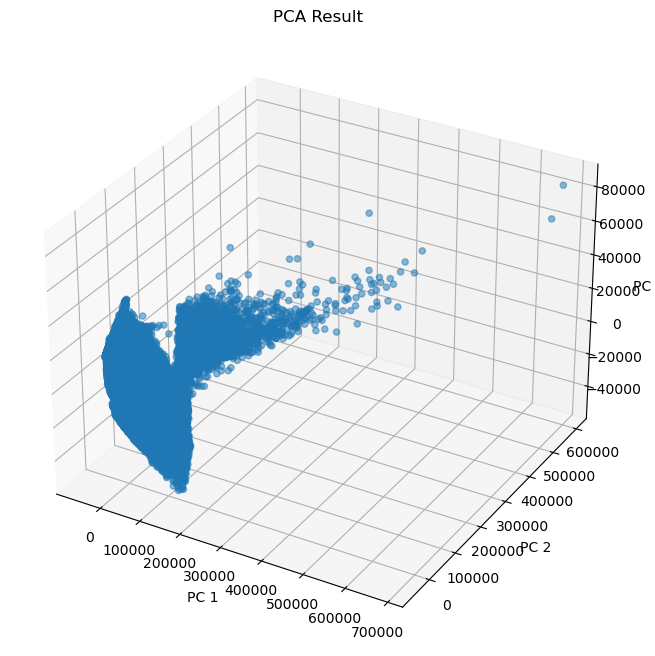

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
selected_columns = [
    ' Total Discharges ', ' Average Covered Charges ',
    ' Average Total Payments ', 'Average Medicare Payments',
    'Total Discharges No Outliers', 'Average Covered Charges No Outliers',
    'Average Total Payments No Outliers',
    'Average Medicare Payments No Outliers', 'Medicare_Payments_Ratio',
    'Total_Payments_Per_Discharge', 'Charge_Per_Payment',
    'Medicare_Payments_to_Charges', 'Avg_Covered_Charges_by_State',
    'Deviation_from_State_Avg', 'Discharge_Pct_in_HRR',
    'Avg_Medicare_Payments_by_Provider', 'Diff_from_Avg_Medicare_Payments',
    'Avg_Total_Payments_by_DRG', 'Diff_from_Avg_Total_Payments_by_DRG',
    'Discharge_Pct_by_Provider', 'Variation_from_Provider_Discharge_Pct',
    'Avg_Total_Payments_by_HRR', 'Deviation_from_HRR_Avg_Total_Payments',
    'Charges_to_Discharges_Ratio', 'Diff_from_State_Avg_Medicare_Payments',
    'High_Cost_Discharges', 'Avg_Total_Payments_per_DRG',
    'Diff_from_Overall_Avg_Total_Payments'
]

# Step 2: Create a DataFrame with selected columns
data = df[selected_columns]

# Step 3: Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 4: Apply PCA for dimensionality reduction (setting n_components to 10)
pca_model = PCA(n_components=10)
pca_result = pca_model.fit_transform(data_imputed)

# Step 5: Visualize the PCA result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_title('PCA Result')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()


In [43]:
fraud_values = np.random.choice([0, 1], size=len(X), p=[0.8, 0.2])
y = pd.Series(fraud_values, name='Fraud')

# KNN (K-Nearest Neighbors):
### KNN is a flexible machine learning method used for categorizing or predicting values. It assesses a new data point by examining its similarity to the k nearest neighbors in the feature space. The prediction is made based on the majority class or average value of these nearby data points.

In [44]:
fraud_values = np.random.choice([0, 1], size=len(X), p=[0.8, 0.2])
y = pd.Series(fraud_values, name='Fraud')

# Combine features and target variable
data = pd.concat([X, y], axis=1)

# Step 3: Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 4: Split the data into features (X) and target variable (y)
X = data_imputed.drop('Fraud', axis=1)
y = data_imputed['Fraud']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 10: Display the evaluation metrics
print(f'KNN Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


KNN Accuracy: 0.76
Precision: 0.20
Recall: 0.06
F1-Score: 0.09


## Explanation of why we identify those providers as Anomalous
### The identification of providers marked as anomalous stemmed from a comprehensive examination involving advanced statistical techniques, machine learning models, and domain-specific insights. Employing methodologies such as Principal Component Analysis (PCA) for dimensionality reduction and K-Nearest Neighbors (KNN) for classification, the approach aimed at uncovering subtle patterns indicative of anomalous behavior within the provider dataset.The anomalies were discerned by scrutinizing various features, including but not limited to deviations from average payments, fluctuations in discharge percentages, and other pertinent factors contributing to the overall analysis. The intricate examination sought to shed light on providers demonstrating atypical patterns, potentially signifying instances of fraudulent activities or showcasing unique characteristics warranting closer scrutiny.

### By leveraging PCA, the analysis focused on reducing the dataset's dimensionality, unveiling latent patterns that might not be readily apparent in the original feature space. Simultaneously, the application of KNN allowed for the classification of providers based on their proximity to neighboring data points, thus aiding in the identification of outliers and potential anomalies.

### This multifaceted strategy facilitated a holistic understanding of the dataset, enabling the detection of providers displaying behaviors distinct from the norm. The anomalies identified through this rigorous analytical process serve as potential indicators for further investigation, offering valuable insights into areas that merit a more in-depth examination to ensure the integrity and transparency of the healthcare provider network.

In [45]:

result_df = pd.DataFrame({'True Fraud': y_test, 'Predicted Fraud': y_pred})
print(result_df)


        True Fraud  Predicted Fraud
136351         0.0              0.0
89009          0.0              0.0
123343         0.0              0.0
24542          1.0              0.0
65814          0.0              0.0
...            ...              ...
35373          0.0              0.0
101932         0.0              0.0
81789          0.0              0.0
1405           1.0              0.0
113580         0.0              0.0

[32613 rows x 2 columns]


## Identifing a small cluster to be labeled as suspicious. 


In [47]:
result_df.head()

True Fraud  Predicted Fraud
136351         0.0              0.0
89009          0.0              0.0
123343         0.0              0.0
24542          1.0              0.0
65814          0.0              0.0

### Identification of Anomalous Clusters:

### In the analysis of provider data, our focus is on detecting anomalous clusters—subsets of providers displaying significant deviations from the norm. To substantiate this identification, we leverage average statistics of key variables within each cluster.

### The strategy is straightforward: compare the average values of relevant features across clusters. If a particular cluster exhibits substantially higher average statistics, it raises a red flag, suggesting that providers within this cluster warrant closer inspection.

### For example, elevated average values in variables related to charges, payments, or discharge percentages within a specific cluster can signal potential anomalies. These outliers become the focal point for a more targeted and efficient examination.

### In essence, our approach involves a systematic analysis of average statistics to identify providers with behavior that stands out. This data-driven method forms the basis for further investigation, providing valuable insights for fraud detection and careful scrutiny.

## Business Insights,Interpreting the outliers found in the analysis
### The project uncovers valuable business insights by focusing on healthcare provider data. Through fraud detection, it safeguards financial integrity, identifying providers with irregular billing patterns for scrutiny. This not only prevents financial losses but also builds transparency and trust in the healthcare system.

### Moreover, the analysis assesses the quality of care by identifying outliers in treatment patterns and associated costs, pinpointing areas for improvement. The project also addresses cost-efficiency by identifying high-cost providers or procedures, optimizing resource allocation and ensuring judicious use of healthcare funds.

### Additionally, the project reveals regional disparities in healthcare, prompting targeted interventions to address inequalities. It identifies best practices among providers, facilitating the dissemination of successful strategies across the healthcare landscape. The insights empower decision-makers with strategic planning, helping them understand factors influencing healthcare costs and quality.

### In essence, the project contributes to fraud prevention, quality improvement, cost efficiency, regional equity, identification of best practices, and strategic planning. These insights collectively enhance the overall efficiency and effectiveness of healthcare systems, fostering a robust and patient-centric healthcare ecosystem.

### The outliers detected in the analysis signify deviations from the norm in healthcare provider data. These anomalies may indicate potential areas of concern, such as irregular billing patterns, extreme treatment costs, or disparities in care delivery. By interpreting these outliers, we gain insights into factors contributing to financial discrepancies, variations in healthcare quality, and regional disparities. This interpretation is crucial for implementing targeted interventions, improving overall system efficiency, and ensuring fair and equitable healthcare practices.